# Multi Class Text Classification with LSTM using TensorFlow 2.0

[Article](https://towardsdatascience.com/multi-class-text-classification-with-lstm-using-tensorflow-2-0-d88627c10a35)

The following are the concepts of Recurrent Neural Networks:
* They make use of sequential information.
* They have a memory that captures what have been calculated so far, i.e. what I spoke last will impact what I will speak next.
* RNNs are ideal for text and speech analysis.
* The most commonly used RNNs are LSTMs.

## Imports

In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
STOPWORDS = set(stopwords.words('english'))

print(tf.__version__)

2.2.0


## Hyperparameters

In [2]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

## Articles and Labels

Define two lists containing articles and labels. In the meantime, we remove stopwords.

In [3]:
articles = []
labels = []

with open("data/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        # remove stopwords
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


There are 2,225 news articles in the data, we split them into training set and validation set, according to the parameter we set earlier, 80% for training, 20% for validation.

## Train-Validate Split

In [4]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


## Pre-Processing

Tokenizer does all the heavy lifting for us. In our articles that it was tokenizing, it will take 5,000 most common words. `oov_token` is to put a special value in when an unseen word is encountered. This means we want `<OOV>` to be used for words that are not in the `word_index`. `fit_on_text` will go through all the text and create dictionary like this:

In [5]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10}

We can see that “`<OOV>`” is the most common token in our corpus, followed by “said”, followed by “mr” and so on.

After tokenization, the next step is to turn those tokens into lists of sequence. The following is the 11th article in the training data that has been turned into sequences.

In [6]:
train_sequences = tokenizer.texts_to_sequences(train_articles)
print(train_sequences[10])

[2432, 1, 225, 4996, 22, 641, 587, 225, 4996, 1, 1, 1663, 1, 1, 2432, 22, 565, 1, 1, 140, 278, 1, 140, 278, 796, 823, 662, 2308, 1, 1144, 1694, 1, 1721, 4997, 1, 1, 1, 1, 1, 4739, 1, 1, 122, 4515, 1, 2, 2874, 1505, 352, 4740, 1, 52, 341, 1, 352, 2172, 3961, 41, 22, 3794, 1, 1, 1, 1, 542, 1, 1, 1, 835, 631, 2367, 347, 4741, 1, 365, 22, 1, 787, 2368, 1, 4302, 138, 10, 1, 3664, 682, 3531, 1, 22, 1, 414, 823, 662, 1, 90, 13, 633, 1, 225, 4996, 1, 600, 1, 1694, 1021, 1, 4998, 808, 1864, 117, 1, 1, 1, 2974, 22, 1, 99, 278, 1, 1608, 4999, 542, 492, 1, 1443, 4742, 779, 1320, 1, 1861, 10, 33, 641, 319, 1, 62, 478, 565, 301, 1506, 22, 479, 1, 1, 1666, 1, 797, 1, 3067, 1, 1364, 6, 1, 2432, 565, 22, 2971, 4736, 1, 1, 1, 1, 1, 850, 39, 1825, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1506, 1342, 374, 20, 63, 883, 1096, 4303, 247]


When we train neural networks for NLP, we need sequences to be in the same size, that’s why we use padding. If you look up, our `max_length` is 200, so we use `pad_sequences` to make all of our articles the same length which is 200. As a result, you will see that the 1st article was 426 in length, it becomes 200, the 2nd article was 192 in length, it becomes 200, and so on.

In [7]:
train_padded = pad_sequences(
    train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

425
200
192
200
186
200


In [8]:
train_sequences[0]

[91,
 160,
 1141,
 1106,
 49,
 979,
 755,
 1,
 89,
 1303,
 4289,
 129,
 175,
 3652,
 1214,
 1195,
 1578,
 42,
 7,
 893,
 91,
 1,
 334,
 85,
 20,
 14,
 130,
 3262,
 1215,
 2422,
 570,
 451,
 1375,
 58,
 3378,
 3521,
 1661,
 8,
 921,
 730,
 10,
 844,
 1,
 9,
 598,
 1579,
 1107,
 395,
 1940,
 1106,
 731,
 49,
 537,
 1397,
 2010,
 1623,
 134,
 249,
 113,
 2356,
 795,
 4981,
 980,
 584,
 10,
 3956,
 3957,
 921,
 2563,
 129,
 344,
 175,
 3652,
 1,
 1,
 39,
 62,
 2867,
 28,
 9,
 4724,
 18,
 1304,
 136,
 416,
 7,
 143,
 1422,
 71,
 4502,
 436,
 4982,
 91,
 1107,
 77,
 1,
 82,
 2011,
 53,
 1,
 91,
 6,
 1008,
 599,
 89,
 1303,
 91,
 1962,
 131,
 137,
 420,
 9,
 2868,
 38,
 152,
 1233,
 89,
 1303,
 4725,
 7,
 436,
 4982,
 3154,
 6,
 2493,
 1,
 431,
 1126,
 1,
 1423,
 571,
 1234,
 1902,
 1,
 766,
 9,
 537,
 1397,
 2010,
 134,
 2068,
 400,
 845,
 1963,
 1601,
 34,
 1717,
 2869,
 1,
 1,
 2423,
 244,
 9,
 2625,
 82,
 732,
 6,
 1172,
 1196,
 152,
 720,
 591,
 1,
 124,
 28,
 1304,
 1690,
 432,
 83,
 93

In addition, there is `padding_type` and `truncating_type`, there are all `post`, means for example, for the 11th article, it was 186 in length, we padded to 200, and we padded at the end, that is adding 14 zeros.

In [9]:
print(train_padded[10])

[2432    1  225 4996   22  641  587  225 4996    1    1 1663    1    1
 2432   22  565    1    1  140  278    1  140  278  796  823  662 2308
    1 1144 1694    1 1721 4997    1    1    1    1    1 4739    1    1
  122 4515    1    2 2874 1505  352 4740    1   52  341    1  352 2172
 3961   41   22 3794    1    1    1    1  542    1    1    1  835  631
 2367  347 4741    1  365   22    1  787 2368    1 4302  138   10    1
 3664  682 3531    1   22    1  414  823  662    1   90   13  633    1
  225 4996    1  600    1 1694 1021    1 4998  808 1864  117    1    1
    1 2974   22    1   99  278    1 1608 4999  542  492    1 1443 4742
  779 1320    1 1861   10   33  641  319    1   62  478  565  301 1506
   22  479    1    1 1666    1  797    1 3067    1 1364    6    1 2432
  565   22 2971 4736    1    1    1    1    1  850   39 1825  675  297
   26  979    1  882   22  361   22   13  301 1506 1342  374   20   63
  883 1096 4303  247    0    0    0    0    0    0    0    0    0    0
    0 

perform the same for validation sequences

In [10]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(
    validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


Now we are going to look at the labels. Because our labels are text, so we will tokenize them, when training, labels are expected to be numpy arrays. So we will turn list of labels into numpy arrays like so:

In [11]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(
    label_tokenizer.texts_to_sequences(validation_labels))
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


Before training deep neural network, we should explore what our original article and article after padding look like. Running the following code, we explore the 11th article, we can see that some words become “`<OOV>`”, because they did not make to the top 5,000.

In [12]:
reverse_word_index = dict([(value, key)
                           for (key, value) in word_index.items()])


def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

berlin <OOV> anti nazi film german movie anti nazi <OOV> <OOV> drawn <OOV> <OOV> berlin film festival <OOV> <OOV> final days <OOV> final days member white rose movement <OOV> 21 arrested <OOV> brother hans <OOV> <OOV> <OOV> <OOV> <OOV> tyranny <OOV> <OOV> director marc <OOV> said feeling responsibility keep legacy <OOV> going must <OOV> keep ideas alive added film drew <OOV> <OOV> <OOV> <OOV> trial <OOV> <OOV> <OOV> east germany secret police discovery <OOV> behind film <OOV> worked closely <OOV> relatives including one <OOV> sisters ensure historical <OOV> film <OOV> members white rose <OOV> group first started <OOV> anti nazi <OOV> summer <OOV> arrested dropped <OOV> munich university calling day <OOV> <OOV> <OOV> regime film <OOV> six days <OOV> arrest intense trial saw <OOV> initially deny charges ended <OOV> appearance one three german films <OOV> top prize festival south african film version <OOV> <OOV> opera <OOV> shot <OOV> town <OOV> language also <OOV> berlin festival film en

## Training Model

Now its the time to implement LSTM.
* We build a `tf.keras.Sequential` model and start with an embedding layer. An embedding layer stores one vector per word. When called, it converts the sequences of word indices into sequences of vectors. After training, words with similar meanings often have the similar vectors.
* The Bidirectional wrapper is used with a LSTM layer, this propagates the input forwards and backwards through the LSTM layer and then concatenates the outputs. This helps LSTM to learn long term dependencies. We then fit it to a dense neural network to do classification.
* We use `relu` in place of `tanh` function since they are very good alternatives of each other.
* We add a `Dense` layer with 6 units and `softmax` activation. When we have multiple outputs, `softmax` converts outputs layers into a probability distribution.

In [13]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, 
    # and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In our model summary, we have our embeddings, our Bidirectional contains LSTM, followed by two dense layers. The output from Bidirectional is 128, because it doubled what we put in LSTM. We can also stack LSTM layer but I found the results worse.

In [14]:
print(set(labels))

{'sport', 'entertainment', 'politics', 'business', 'tech'}


We have 5 labels in total, but because we did not one-hot encode labels, we have to use `sparse_categorical_crossentropy` as loss function, it seems to think 0 is a possible label as well, while the tokenizer object which tokenizes starting with integer 1, instead of integer 0. As a result, the last Dense layer needs outputs for labels 0, 1, 2, 3, 4, 5 although 0 has never been used.

In [15]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs,
                    validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/10
56/56 - 12s - loss: 1.5695 - accuracy: 0.2876 - val_loss: 1.3456 - val_accuracy: 0.3888
Epoch 2/10
56/56 - 10s - loss: 0.9844 - accuracy: 0.6360 - val_loss: 0.6889 - val_accuracy: 0.7551
Epoch 3/10
56/56 - 10s - loss: 0.2521 - accuracy: 0.9376 - val_loss: 0.7847 - val_accuracy: 0.7236
Epoch 4/10
56/56 - 9s - loss: 0.3376 - accuracy: 0.8803 - val_loss: 0.3904 - val_accuracy: 0.8831
Epoch 5/10
56/56 - 13s - loss: 0.1062 - accuracy: 0.9753 - val_loss: 0.2376 - val_accuracy: 0.9326
Epoch 6/10
56/56 - 9s - loss: 0.0214 - accuracy: 0.9966 - val_loss: 0.2334 - val_accuracy: 0.9371
Epoch 7/10
56/56 - 10s - loss: 0.0258 - accuracy: 0.9955 - val_loss: 0.3017 - val_accuracy: 0.9169
Epoch 8/10
56/56 - 13s - loss: 0.0072 - accuracy: 0.9994 - val_loss: 0.2530 - val_accuracy: 0.9483
Epoch 9/10
56/56 - 10s - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.2766 - val_accuracy: 0.9506
Epoch 10/10
56/56 - 9s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.2866 - val_accuracy: 0.9506


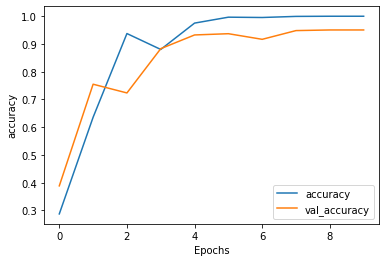

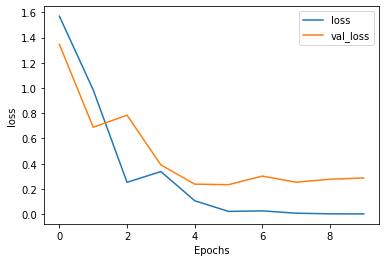

In [16]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

We probably only need 3 or 4 epochs. At the end of the training, we can see that there is a little bit overfitting.